In [1]:
from modAL.models import ActiveLearner
from sklearn.ensemble import RandomForestClassifier
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling
import matplotlib.pyplot as plt

In [2]:
def AL(X_pool, y_pool, X_train, y_train, X_test, y_test, strategy, classifier, batch):
  
  learner = ActiveLearner(
    estimator=classifier,
     query_strategy=strategy
)
  
  learner.teach(X_pool, y_pool)

  query_idx, query_sample = learner.query(X_train)

  query_label=[]
  for idx in query_idx:
      query_label.append(y_train[idx])

  learner.teach(query_sample, query_label)
  X_train = np.delete(X_train, query_idx, axis=0)
  y_train = np.delete(y_train, query_idx)
  accuracy = learner.score(X_test, y_test)
  print(f"Accuracy: {accuracy:.3f}\n")


  performance_test = []
  performance_test.append(learner.score(X_test, y_test))

  performance_train = []
  performance_train.append(learner.score(X_pool, y_pool))


  n_queries = 10
  for i in range(n_queries):
      query_idx, query_instance = learner.query(X_train, n_instances=batch)
      query_label=[]
      for idx in query_idx:
        query_label.append(y_train[idx])

      learner.teach(query_instance, query_label)
      performance_train.append(learner.score(query_instance, query_label))
      X_train = np.delete(X_train, query_idx, axis=0)
      y_train = np.delete(y_train, query_idx, axis=0)

      performance_test.append(learner.score(X_test, y_test))

  x_values = range(n_queries+1)
  plt.plot(x_values, performance_test)
  plt.xlabel("Number of Queries")
  plt.ylabel("Accuracy")
  plt.title("Active Learning Performance testing")
  plt.show()

  plt.plot(x_values, performance_train)
  plt.xlabel("Number of Queries")
  plt.ylabel("Accuracy")
  plt.title("Active Learning Performance training")
  plt.show()

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
X, y = load_breast_cancer(return_X_y=True)
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split (X, y , test_size = 0.2, random_state=42)

In [4]:
X_pool_BC, X_train_BC, y_pool_BC, y_train_BC = train_test_split (X_train_BC, y_train_BC , test_size = 0.4)

In [5]:
print(len(y_pool_BC), len(y_train_BC), len(y_test_BC))

273 182 114


Accuracy: 0.956



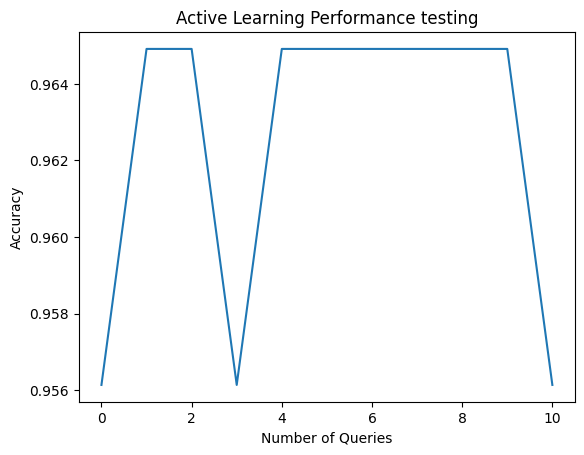

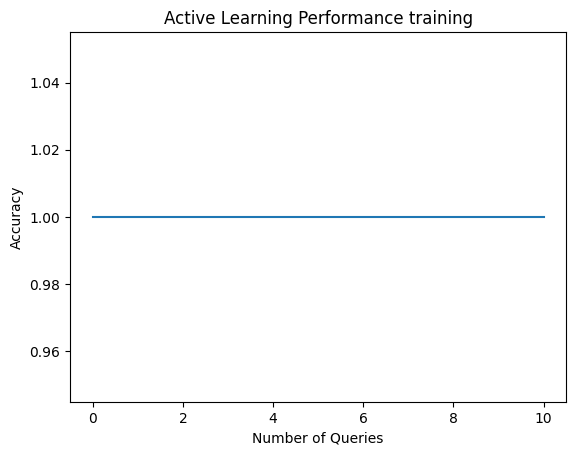

In [6]:
AL(X_pool_BC, y_pool_BC, X_train_BC, y_train_BC, X_test_BC, y_test_BC, uncertainty_sampling,  RandomForestClassifier(), 16)

Accuracy: 0.947



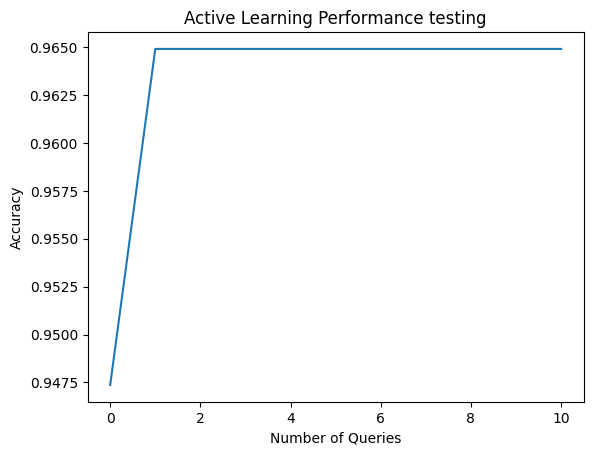

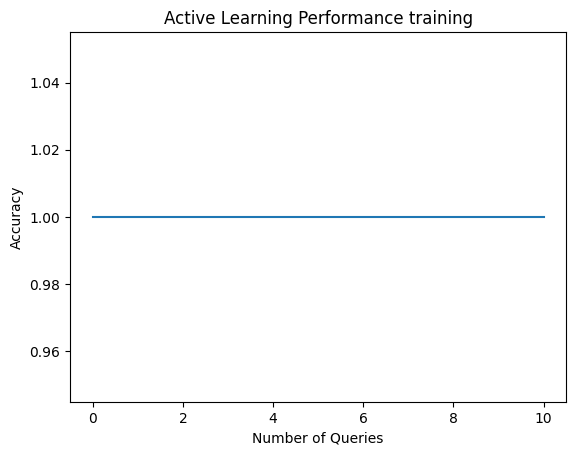

In [7]:
AL(X_pool_BC, y_pool_BC, X_train_BC, y_train_BC, X_test_BC, y_test_BC,margin_sampling ,  RandomForestClassifier(),16)

Accuracy: 0.956



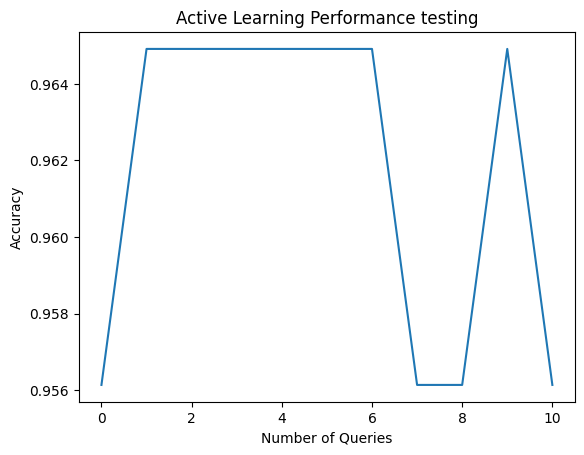

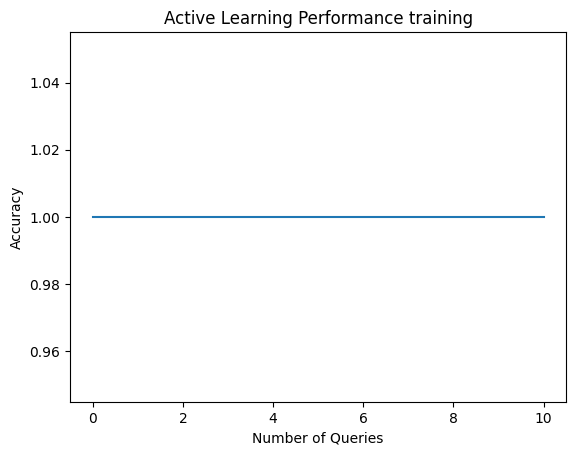

In [8]:
AL(X_pool_BC, y_pool_BC, X_train_BC, y_train_BC, X_test_BC, y_test_BC,entropy_sampling ,  RandomForestClassifier(),16)

In [9]:
from pandas import read_csv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
dataset = read_csv (url, names=columns)

In [10]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
from sklearn.utils import shuffle 
np.random.seed(42)
dataset = shuffle(dataset)
array_dataset = np.array(dataset.values)
X = array_dataset[:,0:4]
y = array_dataset[:,4:]

In [12]:
np.shape(dataset)

(150, 5)

In [13]:
y = np.reshape(y, (y.shape[0], )) #Reshaping the labels to be 1D-nparray -> To fit model shape.
print(y.shape)
print(dataset['class'].unique())

(150,)
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


In [14]:
for i in range(len(y)):
    if y[i] == 'Iris-setosa' : y[i] = 0
    elif y[i] == 'Iris-virginica' : y[i] = 1
    else : y[i] = 2

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X, y , test_size = 0.2)

In [16]:
X_train, X_pool, y_train, y_pool = train_test_split (X_train, y_train , test_size = 0.4)

In [17]:
y_train = y_train.astype(float)
y_pool = y_pool.astype(float)
y_test = y_test.astype(float)

In [18]:
print(len(y_pool), len(y_train), len(y_test))

48 72 30


Accuracy: 0.833



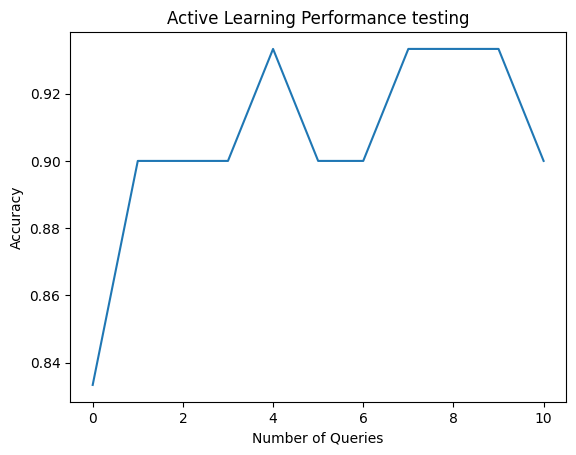

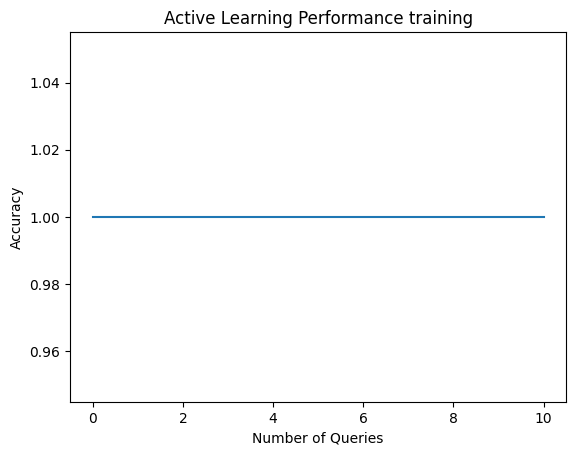

In [19]:
AL(X_pool, y_pool, X_train, y_train, X_test, y_test, uncertainty_sampling, RandomForestClassifier(),5)

Accuracy: 0.933



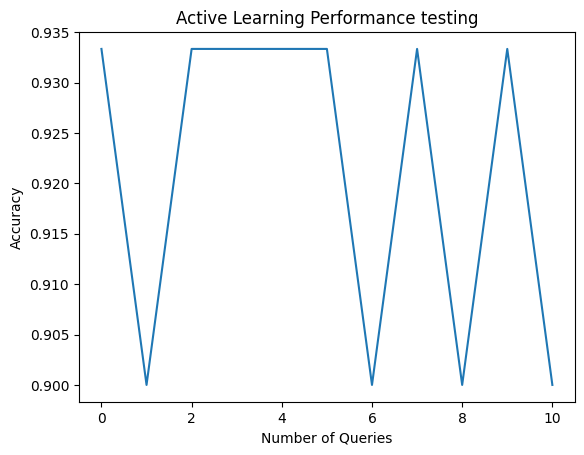

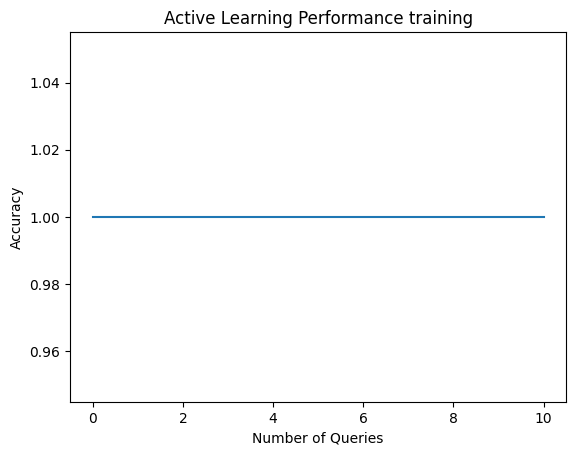

In [20]:
AL(X_pool, y_pool, X_train, y_train, X_test, y_test,margin_sampling , RandomForestClassifier() , 5)

Accuracy: 0.833



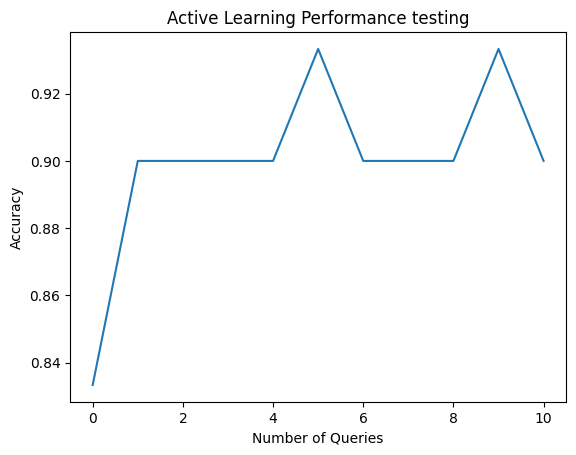

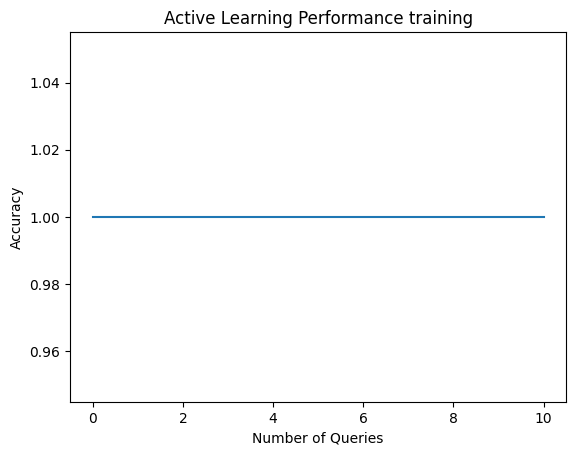

In [21]:
AL(X_pool, y_pool, X_train, y_train, X_test, y_test,entropy_sampling , RandomForestClassifier() , 5)

In [22]:
imbalanced_data = read_csv('/content/creditcard.csv')

In [23]:
imbalanced_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
imbalanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
imbalanced_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
imbalanced_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
np.shape(impalanced_data)

(284807, 31)

In [28]:
np.random.seed(42)
imbalanced_data = shuffle(imbalanced_data)
array_dataset = np.array(imbalanced_data.values)
Xx = array_dataset[:,0:30]
yy = array_dataset[:,30:]

In [29]:
yy = np.reshape(yy, (yy.shape[0], ))
np.shape(yy)

(284807,)

In [30]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split (Xx, yy , test_size = 0.2)

In [31]:
Xx_train, Xx_pool, yy_train, yy_pool = train_test_split (Xx_train, yy_train , test_size = 0.4)

In [32]:
yy_train = yy_train.astype(float)
yy_pool = yy_pool.astype(float)
yy_test = yy_test.astype(float)

In [33]:
print(len(yy_pool), len(yy_train), len(yy_test))

91138 136707 56962


Accuracy: 1.000



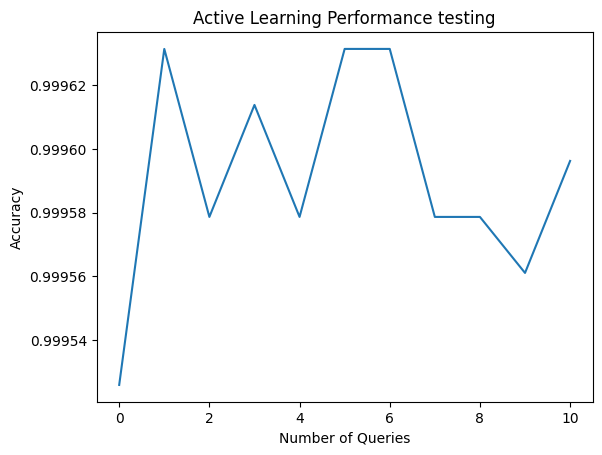

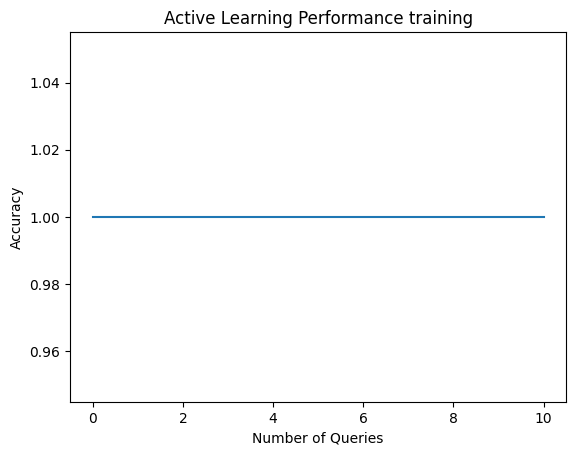

In [34]:
AL(Xx_pool, yy_pool, Xx_train, yy_train, Xx_test, yy_test, uncertainty_sampling, RandomForestClassifier() ,500)

Accuracy: 1.000



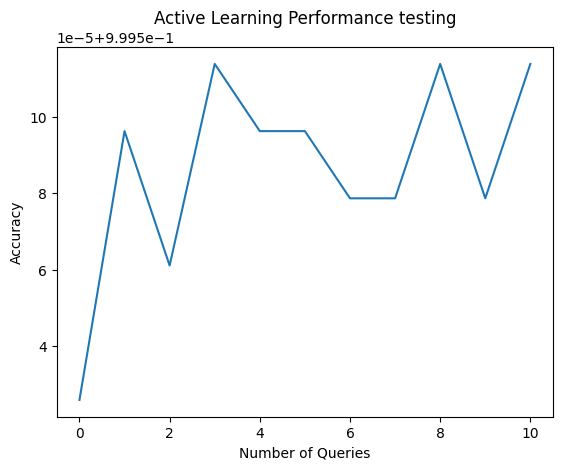

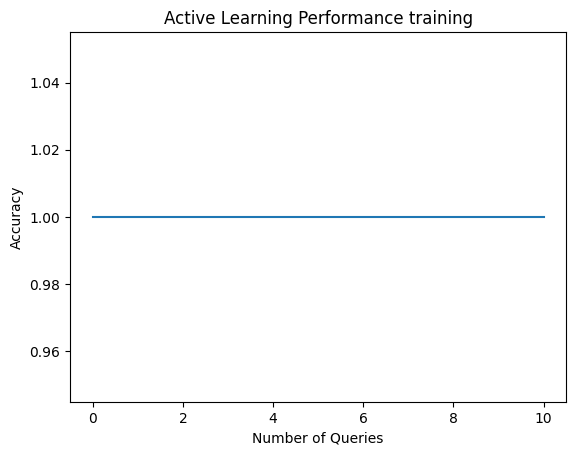

In [35]:
AL(Xx_pool, yy_pool, Xx_train, yy_train, Xx_test, yy_test, margin_sampling, RandomForestClassifier(),500)

Accuracy: 0.999



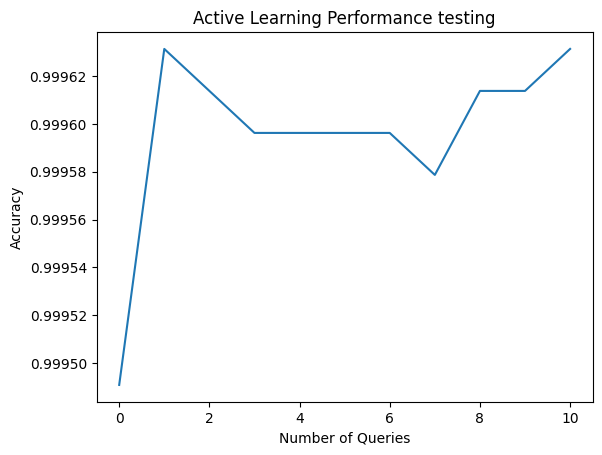

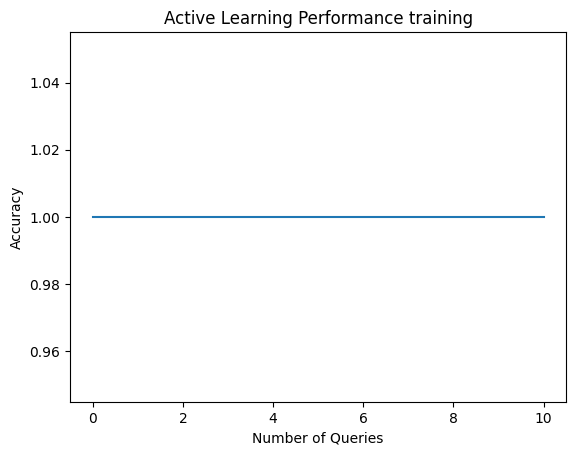

In [36]:
AL(Xx_pool, yy_pool, Xx_train, yy_train, Xx_test, yy_test, entropy_sampling, RandomForestClassifier(),500)